In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.13.0


## Creating Some Data to View and Fit

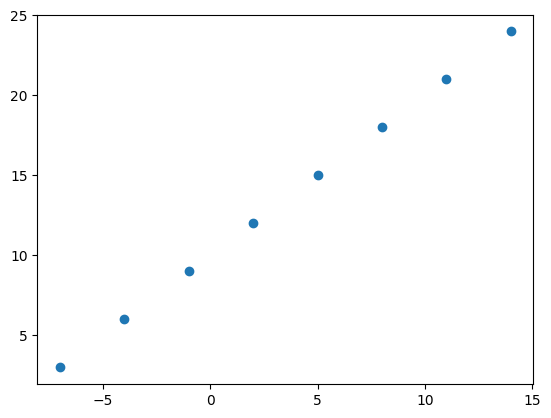

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([[-7.0,-4,-1,2,5,8,11,14]])

# Create labels
y = np.array([3.0,6,9,12,15,18,21,24])

# Visualize it
plt.scatter(X,y);

In [95]:
y == X + 10

array([[ True,  True,  True,  True,  True,  True,  True,  True]])

## Input and output shapes


In [96]:
# Creat a demo tensor for our housing price prediction problem

house_info = tf.constant(['bedroom','bathroom','garagge'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garagge'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [97]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((8,), ())

In [98]:
X[0], y[0]

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]), 3.0)

In [118]:
X[1], y[1]

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-4.], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [100]:
X[0].ndim

1

In [106]:
## Turn our Numpy arrays into tensors
X = tf.transpose(tf.cast(tf.constant(X),dtype=tf.float32))
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [107]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([1]), TensorShape([]))

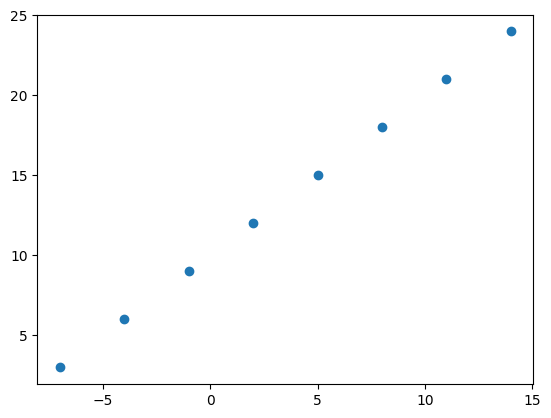

In [108]:
plt.scatter(X,y)

In [109]:
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

In [113]:
## Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    
])


# 2. Compile the model
model.compile( loss=tf.keras.losses.mae, # mea is short for mean absolute error
     optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
             metrics = ['mae']
)

# 3. Fit the model
model.fit(X,y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 387ms/step - loss: 9.1434 - mae: 9.1434
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 9.0109 - mae: 9.0109
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 8.8784 - mae: 8.8784
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 8.7459 - mae: 8.7459
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 8.6134 - mae: 8.6134


In [114]:
# Check ouit X and y
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [115]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 85ms/step


array([[24.185432]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of  the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [117]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 435ms/step - loss: 14.2839 - mae: 14.2839
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 14.1514 - mae: 14.1514
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 14.0189 - mae: 14.0189
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 13.8864 - mae: 13.8864
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 13.7539 - mae: 13.7539
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 13.6214 - mae: 13.6214
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 13.4889 - mae: 13.4889
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 13.3564 - mae: 13.3564
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 13.2239 - mae: 13.2239
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 13.0914 - mae: 13.0914
Epoch 11/100
1/1 [==============================]

1/1 [==============================] - 0s 16ms/step - loss: 6.9131 - mae: 6.9131
Epoch 88/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9075 - mae: 6.9075
Epoch 89/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9019 - mae: 6.9019
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8963 - mae: 6.8963
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8906 - mae: 6.8906
Epoch 92/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8850 - mae: 6.8850
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8794 - mae: 6.8794
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8738 - mae: 6.8738
Epoch 95/100
1/1 [==============================] - 0s 0s/step - loss: 6.8681 - mae: 6.8681
Epoch 96/100
1/1 [==============================] - 0s 0s/step - loss: 6.8625 - mae: 6.8625
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 6.856

In [119]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [120]:
# Let's see if our model prediction has improved

model.predict([17.0])

1/1 [==============================] - 0s 100ms/step


array([[29.805058]], dtype=float32)

In [233]:
# 1. Create a model (specified to youri problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=tf.keras.metrics.mae)

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 0s/step - loss: 88.1236 - mean_absolute_error: 88.1236
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 48.2561 - mean_absolute_error: 48.2561
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 29.4239 - mean_absolute_error: 29.4239
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 39.5628 - mean_absolute_error: 39.5628
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 35.7600 - mean_absolute_error: 35.7600
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 44.9515 - mean_absolute_error: 44.9515
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 25.0937 - mean_absolute_error: 25.0937
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 59.7785 - mean_absolute_error: 59.7785
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 34.0736 - mean_absolute_error: 34.0736
Epoch 

2/2 [==============================] - 0s 16ms/step - loss: 36.4562 - mean_absolute_error: 36.4562
Epoch 75/100
2/2 [==============================] - 0s 0s/step - loss: 15.5219 - mean_absolute_error: 15.5219
Epoch 76/100
2/2 [==============================] - 0s 0s/step - loss: 31.8040 - mean_absolute_error: 31.8040
Epoch 77/100
2/2 [==============================] - 0s 0s/step - loss: 34.9923 - mean_absolute_error: 34.9923
Epoch 78/100
2/2 [==============================] - 0s 16ms/step - loss: 21.1909 - mean_absolute_error: 21.1909
Epoch 79/100
2/2 [==============================] - 0s 16ms/step - loss: 24.2885 - mean_absolute_error: 24.2885
Epoch 80/100
2/2 [==============================] - 0s 16ms/step - loss: 61.1940 - mean_absolute_error: 61.1940
Epoch 81/100
2/2 [==============================] - 0s 0s/step - loss: 37.0528 - mean_absolute_error: 37.0528
Epoch 82/100
2/2 [==============================] - 0s 0s/step - loss: 8.9873 - mean_absolute_error: 8.9873
Epoch 83/100
2/2 

In [147]:
# Let's see if our model prediction has improved

model.predict([17.0])

1/1 [==============================] - 0s 107ms/step


array([[32.446705]], dtype=float32)

# Real Model

In [234]:
# Let's see if we can improve the model more

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# 3. Fit the model
#model.fit(X,y, epochs=100)


In [151]:
# Let6's remind ourselves of the data
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [152]:
# Let6's try and make prediction
model.predict([17.0])

1/1 [==============================] - 0s 100ms/step


array([[26.844063]], dtype=float32)

## Evaluating a model

### In practice, a typical workflow youi go throuigh when building neural network is:

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it..
    


When it comes to evaluation... there are 3 words youi should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth

In [215]:
# Make a bigger dataset
X = (tf.range(-100,100,4))
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [216]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

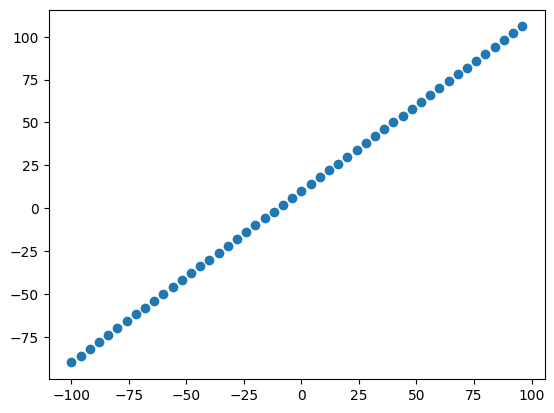

In [217]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y);

### The 3 sets...
* Training set - the model learns from this data, which is typically 70 - 80% of the total data you have available
* Validation set - the model gets tuned on this data, which is typically 10 -15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10 - 15% of the total data available.

In [167]:
# Check the lenght of how many samples we have
len(X)

50

In [218]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80 % of the data)
X_test = X[40:]
y_train = y[:40] # last 10 are testing samples (20 % of the data)
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data
Now we've got our data in training and test sets... let's visualize it again!

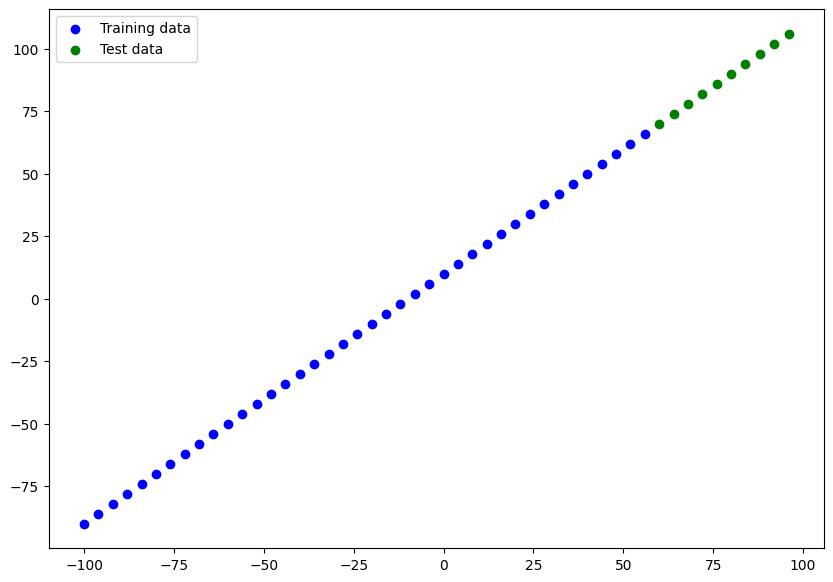

In [219]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train, y_train, c = 'b', label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c = 'g', label="Test data")

# Show a legend
plt.legend();

In [176]:
# Let6's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs= 100)

In [177]:
model.build()

ValueError: You must provide an `input_shape` argument.

In [265]:
# Let6's create a model which builds automatically by defining the input shape argument
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name= "Input_layer"),
    tf.keras.layers.Dense(50, name= "Hidden_layer"),
    tf.keras.layers.Dense(1,name= "output_layer" )
], name= "Mazimum_1")

# 2. Compile the model
model.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])


In [266]:
model.summary()

Model: "Mazimum_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 100)               200       
                                                                 
 Hidden_layer (Dense)        (None, 50)                5050      
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models duriing **transfer learning**)

&#x1F4D6;  **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out <p id='https://www.youtube.com/watch?v=QDX-1M5Nj7s&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI'> MIT's introduction to deep learning video.

&#x1F6E0; **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that affects the number of parameters (total and trainable) by calling model.summary().

In [267]:
# Let6's fit ouir model to the training data
model.fit(X_train, y_train, epochs = 100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 53ms/step - loss: 37.1053 - mae: 37.1053
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 20.0256 - mae: 20.0256
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 21.6435 - mae: 21.6435
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 20.1115 - mae: 20.1115
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 9.6020 - mae: 9.6020
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 15.8854 - mae: 15.8854
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 10.6208 - mae: 10.6208
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 9.8910 - mae: 9.8910
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 10.1433 - mae: 10.1433
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 7.5206 - mae: 7.5206
Epoch 11/100
2/2 [==============================] - 0s 16ms/step - 

2/2 [==============================] - 0s 0s/step - loss: 1.7024 - mae: 1.7024
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 5.3016 - mae: 5.3016
Epoch 90/100
2/2 [==============================] - 0s 22ms/step - loss: 5.0554 - mae: 5.0554
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 1.3792 - mae: 1.3792
Epoch 92/100
2/2 [==============================] - 0s 0s/step - loss: 4.7879 - mae: 4.7879
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 2.3707 - mae: 2.3707
Epoch 94/100
2/2 [==============================] - 0s 16ms/step - loss: 2.4531 - mae: 2.4531
Epoch 95/100
2/2 [==============================] - 0s 7ms/step - loss: 1.5008 - mae: 1.5008
Epoch 96/100
2/2 [==============================] - 0s 0s/step - loss: 1.9005 - mae: 1.9005
Epoch 97/100
2/2 [==============================] - 0s 0s/step - loss: 1.1509 - mae: 1.1509
Epoch 98/100
2/2 [==============================] - 0s 16ms/step - loss: 1.0382 - 

In [268]:
# Get a summary of our model
model.summary()

Model: "Mazimum_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 100)               200       
                                                                 
 Hidden_layer (Dense)        (None, 50)                5050      
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [269]:
#pip install pydot

### Visualizing our model prediction

To visualize predictions, it6's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of 'y_true' versus 'y_pred' (ground truth versus your model)

In [270]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 94ms/step


array([[ 69.04203 ],
       [ 72.97197 ],
       [ 76.90193 ],
       [ 80.83189 ],
       [ 84.76185 ],
       [ 88.691795],
       [ 92.621735],
       [ 96.55169 ],
       [100.48163 ],
       [104.4116  ]], dtype=float32)

In [271]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

&#x1F511; **Note:** If you feel like you're going to reuse some kind of functionality in the future, its a good idea to turn it into a function

In [272]:
# Let's create a plotting function

def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data= X_test,
                    test_labels = y_test,
                    predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth lables.
    """
    
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data,train_labels, c = "b", label = "Training data")
    # Plot testing data in green
    plt.scatter(test_data,test_labels, c="g", label= "Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data,predictions, c="r", label= "Predictions")
    # Show the legend
    plt.legend();

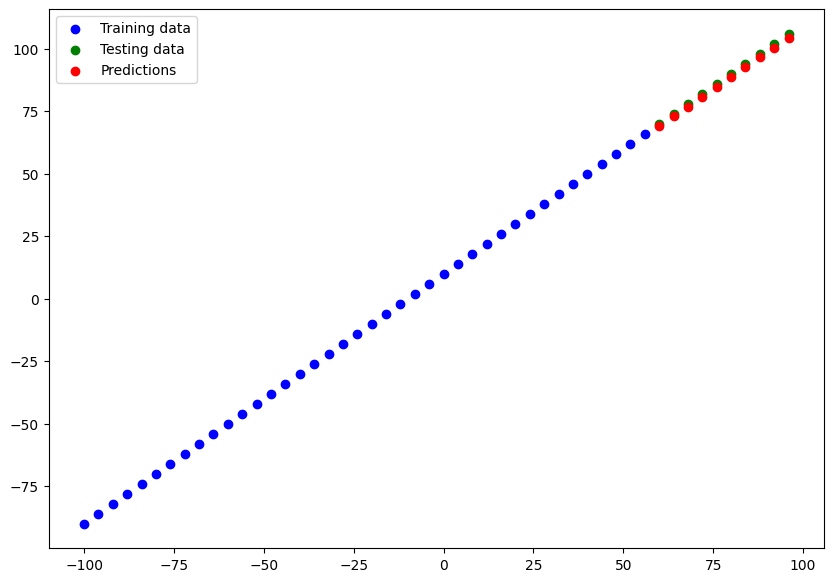

In [273]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - Mean square error, "Square the average errors"

In [274]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 201ms/step - loss: 1.2732 - mae: 1.2732


[1.2731879949569702, 1.2731879949569702]

In [281]:
# Calculate the mean absolute error
#tf.keras.losses.mae(y_test,y_pred).numpy()
mae= tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.95797 , 15.622424, 13.058841, 11.267245, 10.24763 , 10.      ,
       10.524347, 11.820676, 13.888977, 16.729279], dtype=float32)>

In [282]:
y_pred, y_pred.shape

(array([[ 69.04203 ],
        [ 72.97197 ],
        [ 76.90193 ],
        [ 80.83189 ],
        [ 84.76185 ],
        [ 88.691795],
        [ 92.621735],
        [ 96.55169 ],
        [100.48163 ],
        [104.4116  ]], dtype=float32),
 (10, 1))

In [276]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [283]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.04203 ,  72.97197 ,  76.90193 ,  80.83189 ,  84.76185 ,
        88.691795,  92.621735,  96.55169 , 100.48163 , 104.4116  ],
      dtype=float32)>

In [284]:
# Calculate the mean absolute error
mea = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mea

<tf.Tensor: shape=(), dtype=float32, numpy=1.2731888>

In [285]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.6614907>

In [294]:
# Make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))
def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

'''
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> fit it -> evaluate it ...
'''

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer- give your model more of a chance to find patterns in the data.

Let6's do 3 modelling experiments:
1. 'model 1' - same as the original model, 1 layer, trained for 100 epochs.
2. 'model 2' - 2 layers, trained for 100 epochs
3. 'model 3' - 3 layers, trained for 500 epochs
4. 'model 4' - 
5. 'model 4'

**Build** model_1

In [289]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# 3. Fit the model
model_1.fit(X_train,y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 0s/step - loss: 101.8389 - mae: 101.8389
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 66.3834 - mae: 66.3834
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 29.1037 - mae: 29.1037
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 10.3794 - mae: 10.3794
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 11.4071 - mae: 11.4071
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 10.5251 - mae: 10.5251
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 9.4895 - mae: 9.4895
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 9.3509 - mae: 9.3509
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 7.5429 - mae: 7.5429
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 12.6131 - mae: 12.6131
Epoch 11/100
2/2 [==============================] - 0s 7ms/step

2/2 [==============================] - 0s 0s/step - loss: 9.9631 - mae: 9.9631
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 7.2773 - mae: 7.2773
Epoch 90/100
2/2 [==============================] - 0s 16ms/step - loss: 12.7231 - mae: 12.7231
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 7.3390 - mae: 7.3390
Epoch 92/100
2/2 [==============================] - 0s 0s/step - loss: 7.7038 - mae: 7.7038
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 7.1432 - mae: 7.1432
Epoch 94/100
2/2 [==============================] - 0s 16ms/step - loss: 12.5707 - mae: 12.5707
Epoch 95/100
2/2 [==============================] - 0s 12ms/step - loss: 9.9491 - mae: 9.9491
Epoch 96/100
2/2 [==============================] - 0s 10ms/step - loss: 9.1619 - mae: 9.1619
Epoch 97/100
2/2 [==============================] - 0s 10ms/step - loss: 12.1005 - mae: 12.1005
Epoch 98/100
2/2 [==============================] - 0s 10ms/step - loss

1/1 [==============================] - 0s 85ms/step


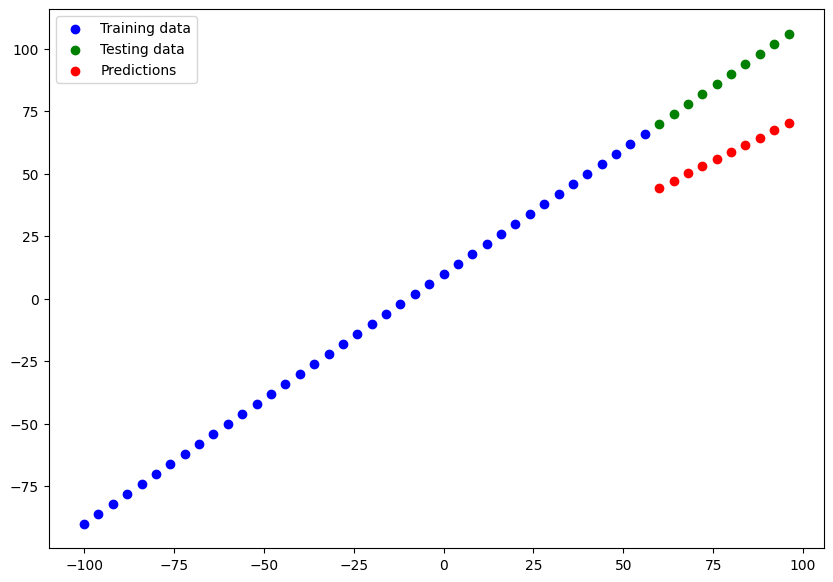

In [291]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1);

In [295]:
# Calculate model_! evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.68288>,
 <tf.Tensor: shape=(), dtype=float32, numpy=951.8916>)

**Build 'model_2'**
* 2 dense layers, trained for 100 epochs

In [302]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape= [1], name="Input_layer"),
    tf.keras.layers.Dense(1, name='Output_layer')
])

# 2. Compile Model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mse"])

# 3. fit model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 35.8893 - mse: 1976.2859
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 29.1862 - mse: 1165.6395
Epoch 3/100
2/2 [==============================] - 0s 22ms/step - loss: 32.3965 - mse: 1584.5187
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 16.9607 - mse: 421.9130
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 22.6467 - mse: 752.9442
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 11.7933 - mse: 161.5690
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 12.9287 - mse: 229.5549
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 11.2025 - mse: 160.9136
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 41.1990 - mse: 2685.8325
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 28.5000 - mse: 1145.9696
Epoch 11/100
2/2 [======================

2/2 [==============================] - 0s 16ms/step - loss: 22.4971 - mse: 723.9208
Epoch 87/100
2/2 [==============================] - 0s 0s/step - loss: 11.3647 - mse: 153.7038
Epoch 88/100
2/2 [==============================] - 0s 0s/step - loss: 26.5083 - mse: 1003.4268
Epoch 89/100
2/2 [==============================] - 0s 0s/step - loss: 9.6510 - mse: 130.2939
Epoch 90/100
2/2 [==============================] - 0s 7ms/step - loss: 18.6731 - mse: 499.9447
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 10.4790 - mse: 165.1294
Epoch 92/100
2/2 [==============================] - 0s 0s/step - loss: 17.8972 - mse: 437.9637
Epoch 93/100
2/2 [==============================] - 0s 0s/step - loss: 6.5986 - mse: 62.5846
Epoch 94/100
2/2 [==============================] - 0s 0s/step - loss: 11.1236 - mse: 151.6828
Epoch 95/100
2/2 [==============================] - 0s 0s/step - loss: 24.2058 - mse: 878.3749
Epoch 96/100
2/2 [==============================] - 0s 7ms/s

1/1 [==============================] - 0s 63ms/step


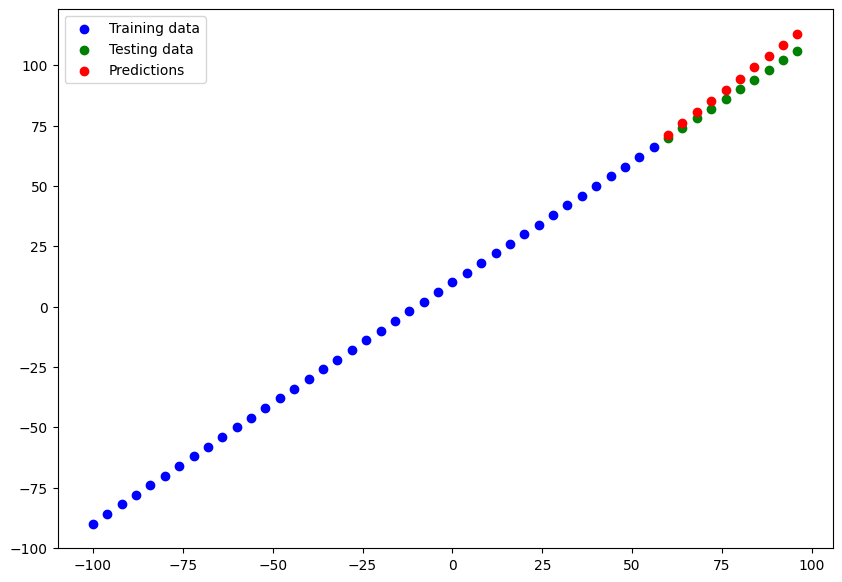

In [303]:
# Predict
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [304]:
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=4.14581>,
 <tf.Tensor: shape=(), dtype=float32, numpy=20.5763>)

**Build 'model_3'**
* 2 layers, trained for 500 epochs

In [310]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# 3. Fit model
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 16ms/step - loss: 24.7687 - mae: 24.7687
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 24.7652 - mae: 24.7652
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 29.5565 - mae: 29.5565
Epoch 4/500
2/2 [==============================] - 0s 16ms/step - loss: 15.4497 - mae: 15.4497
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 22.3415 - mae: 22.3415
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 11.5548 - mae: 11.5548
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 12.6540 - mae: 12.6540
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 11.1030 - mae: 11.1030
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 40.1559 - mae: 40.1559
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 27.5925 - mae: 27.5925
Epoch 11/500
2/2 [==============================] - 0s

2/2 [==============================] - 0s 16ms/step - loss: 20.3335 - mae: 20.3335
Epoch 88/500
2/2 [==============================] - 0s 16ms/step - loss: 34.0496 - mae: 34.0496
Epoch 89/500
2/2 [==============================] - 0s 16ms/step - loss: 10.6310 - mae: 10.6310
Epoch 90/500
2/2 [==============================] - 0s 16ms/step - loss: 23.5322 - mae: 23.5322
Epoch 91/500
2/2 [==============================] - 0s 16ms/step - loss: 11.1347 - mae: 11.1347
Epoch 92/500
2/2 [==============================] - 0s 0s/step - loss: 20.3920 - mae: 20.3920
Epoch 93/500
2/2 [==============================] - 0s 0s/step - loss: 6.5414 - mae: 6.5414
Epoch 94/500
2/2 [==============================] - 0s 0s/step - loss: 11.1685 - mae: 11.1685
Epoch 95/500
2/2 [==============================] - 0s 0s/step - loss: 24.6065 - mae: 24.6065
Epoch 96/500
2/2 [==============================] - 0s 16ms/step - loss: 10.7795 - mae: 10.7795
Epoch 97/500
2/2 [==============================] - 0s 16ms/ste

2/2 [==============================] - 0s 8ms/step - loss: 28.6799 - mae: 28.6799
Epoch 173/500
2/2 [==============================] - 0s 18ms/step - loss: 16.4032 - mae: 16.4032
Epoch 174/500
2/2 [==============================] - 0s 10ms/step - loss: 11.7318 - mae: 11.7318
Epoch 175/500
2/2 [==============================] - 0s 10ms/step - loss: 27.1755 - mae: 27.1755
Epoch 176/500
2/2 [==============================] - 0s 16ms/step - loss: 8.7379 - mae: 8.7379
Epoch 177/500
2/2 [==============================] - 0s 0s/step - loss: 8.7577 - mae: 8.7577
Epoch 178/500
2/2 [==============================] - 0s 0s/step - loss: 16.1987 - mae: 16.1987
Epoch 179/500
2/2 [==============================] - 0s 16ms/step - loss: 10.3964 - mae: 10.3964
Epoch 180/500
2/2 [==============================] - 0s 22ms/step - loss: 7.9806 - mae: 7.9806
Epoch 181/500
2/2 [==============================] - 0s 16ms/step - loss: 17.7842 - mae: 17.7842
Epoch 182/500
2/2 [==============================] - 0s

2/2 [==============================] - 0s 10ms/step - loss: 8.3228 - mae: 8.3228
Epoch 258/500
2/2 [==============================] - 0s 10ms/step - loss: 13.1832 - mae: 13.1832
Epoch 259/500
2/2 [==============================] - 0s 8ms/step - loss: 9.5154 - mae: 9.5154
Epoch 260/500
2/2 [==============================] - 0s 0s/step - loss: 38.4188 - mae: 38.4188
Epoch 261/500
2/2 [==============================] - 0s 0s/step - loss: 15.4995 - mae: 15.4995
Epoch 262/500
2/2 [==============================] - 0s 16ms/step - loss: 5.7792 - mae: 5.7792
Epoch 263/500
2/2 [==============================] - 0s 16ms/step - loss: 14.6022 - mae: 14.6022
Epoch 264/500
2/2 [==============================] - 0s 16ms/step - loss: 18.7598 - mae: 18.7598
Epoch 265/500
2/2 [==============================] - 0s 7ms/step - loss: 13.0697 - mae: 13.0697
Epoch 266/500
2/2 [==============================] - 0s 16ms/step - loss: 10.5407 - mae: 10.5407
Epoch 267/500
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 16ms/step - loss: 13.9396 - mae: 13.9396
Epoch 343/500
2/2 [==============================] - 0s 16ms/step - loss: 14.8125 - mae: 14.8125
Epoch 344/500
2/2 [==============================] - 0s 16ms/step - loss: 13.3917 - mae: 13.3917
Epoch 345/500
2/2 [==============================] - 0s 0s/step - loss: 31.0150 - mae: 31.0150
Epoch 346/500
2/2 [==============================] - 0s 16ms/step - loss: 10.7013 - mae: 10.7013
Epoch 347/500
2/2 [==============================] - 0s 22ms/step - loss: 25.7142 - mae: 25.7142
Epoch 348/500
2/2 [==============================] - 0s 16ms/step - loss: 12.9243 - mae: 12.9243
Epoch 349/500
2/2 [==============================] - 0s 16ms/step - loss: 13.1544 - mae: 13.1544
Epoch 350/500
2/2 [==============================] - 0s 0s/step - loss: 15.4397 - mae: 15.4397
Epoch 351/500
2/2 [==============================] - 0s 16ms/step - loss: 32.9505 - mae: 32.9505
Epoch 352/500
2/2 [=============================

2/2 [==============================] - 0s 10ms/step - loss: 11.3267 - mae: 11.3267
Epoch 428/500
2/2 [==============================] - 0s 10ms/step - loss: 8.9615 - mae: 8.9615
Epoch 429/500
2/2 [==============================] - 0s 8ms/step - loss: 25.8116 - mae: 25.8116
Epoch 430/500
2/2 [==============================] - 0s 20ms/step - loss: 17.5282 - mae: 17.5282
Epoch 431/500
2/2 [==============================] - 0s 12ms/step - loss: 10.7055 - mae: 10.7055
Epoch 432/500
2/2 [==============================] - 0s 10ms/step - loss: 11.5699 - mae: 11.5699
Epoch 433/500
2/2 [==============================] - 0s 10ms/step - loss: 11.3797 - mae: 11.3797
Epoch 434/500
2/2 [==============================] - 0s 2ms/step - loss: 30.3625 - mae: 30.3625
Epoch 435/500
2/2 [==============================] - 0s 8ms/step - loss: 10.5010 - mae: 10.5010
Epoch 436/500
2/2 [==============================] - 0s 8ms/step - loss: 28.8419 - mae: 28.8419
Epoch 437/500
2/2 [==============================]

1/1 [==============================] - 0s 116ms/step


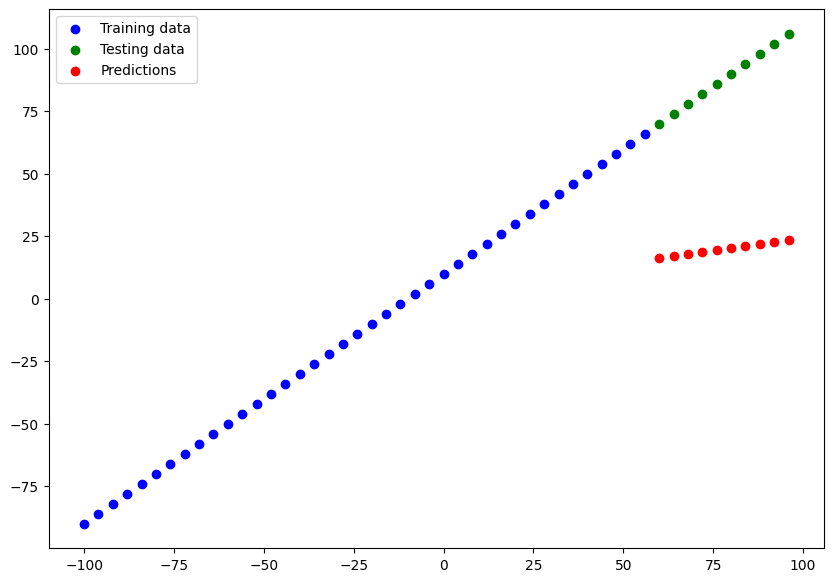

In [311]:
# Predict
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [312]:
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.9719>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4704.609>)

&#x1F511; **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments
We've run a few experiments, let's compare the results.

In [320]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = pd.DataFrame({'mse': [mse_1.numpy(),mse_2.numpy(),mse_3.numpy()], 'mae':[mae_1.numpy(),mae_2.numpy(),mae_3.numpy()]},index=['model_1','model_2','model_3'])

In [321]:
model_results

,mse,mae
model_1,951.891602,30.682880
model_2,20.576300,4.145810
model_3,4704.608887,67.971901


## Looks like model_2 performed the best...

In [322]:
model_2.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 50)                100       
                                                                 
 Output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> &#x1F511; **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the learning practitioner's motto: expriment, experiment, experment...

## Tracking your experiments
One really good habit in ML modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

&#x1F4D6; **Resource:** As you build more models, you6'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of ML experiments (plugs straight into TensorBoard).                                                                                          

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [324]:
# Save model
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [325]:
# Save model using the HDF5 format
model_2.save("best_model_SavedModel_format.h5")

C:\Users\JERRI\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [326]:
# Load in the SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model(r'C:\Users\JERRI\Downloads\Desktop\tf\best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 50)                100       
                                                                 
 Output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [327]:
model_2.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 50)                100       
                                                                 
 Output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [328]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds==loaded_SavedModel_format_preds

1/1 [==============================] - 0s 464ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [329]:
model_2_preds, loaded_SavedModel_format_preds

(array([[ 71.261826],
        [ 75.90271 ],
        [ 80.543594],
        [ 85.18449 ],
        [ 89.82536 ],
        [ 94.46625 ],
        [ 99.10714 ],
        [103.748024],
        [108.38891 ],
        [113.0298  ]], dtype=float32),
 array([[ 71.261826],
        [ 75.90271 ],
        [ 80.543594],
        [ 85.18449 ],
        [ 89.82536 ],
        [ 94.46625 ],
        [ 99.10714 ],
        [103.748024],
        [108.38891 ],
        [113.0298  ]], dtype=float32))

In [330]:
# Load in a model using the .h5 format

loaded_h5_model =tf.keras.models.load_model(r'C:\Users\JERRI\Downloads\Desktop\tf\best_model_SavedModel_format.h5')
loaded_h5_model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 50)                100       
                                                                 
 Output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [331]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds==loaded_h5_model_preds

1/1 [==============================] - 1s 586ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:
    
    1. You can go to the "files" tab and righ click on the file you're after and click 'download'.
    2. Use code (see the cell below).
    3. Save it to Google Drive by connecting and copying it there (see 2nd code cell below)

## A larger Example